# Practice Session 01+02: Data preparation

<font size="+2" color="blue">Additional results: model purchased device</font>

Author: <font color="blue">Manvir Kaur Singh</font>

E-mail: <font color="blue">manvir.kaur01@estudiant.upf.edu</font>

Date: <font color="blue">7/10/2023</font>

# 1. Exploratory data analysis 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split


In [2]:
import sklearn

In [3]:
#FOR EXTRA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [4]:
# LEAVE AS-IS

input_dataset = pd.read_csv("device_db.csv", sep=",")

## 1.1. Data types and simple statistics

<font size="+1" color="red">Replace this cell with your code to print the dataset header (column names) and the first five rows of data.</font>

In [5]:
#print only the header
print(input_dataset.columns)

Index(['PURCHASED_DEVICE', 'DEVICE_VALUE', 'LAST_DEVICE_CHANGE',
       'DATA_TRAFFIC_MONTH_1', 'DATA_TRAFFIC_MONTH_2', 'DATA_TRAFFIC_MONTH_3',
       'DATA_TRAFFIC_MONTH_4', 'DATA_TRAFFIC_MONTH_5', 'DATA_TRAFFIC_MONTH_6',
       'VOICE_TRAFFIC_MONTH_1', 'VOICE_TRAFFIC_MONTH_2',
       'VOICE_TRAFFIC_MONTH_3', 'VOICE_TRAFFIC_MONTH_4',
       'VOICE_TRAFFIC_MONTH_5', 'VOICE_TRAFFIC_MONTH_6', 'BILLING_MONTH_1',
       'BILLING_MONTH_2', 'BILLING_MONTH_3', 'BILLING_MONTH_4',
       'BILLING_MONTH_5', 'BILLING_MONTH_6', 'DEVICE_COST_MONTH_1',
       'DEVICE_COST_MONTH_2', 'DEVICE_COST_MONTH_3', 'DEVICE_COST_MONTH_4',
       'DEVICE_COST_MONTH_5', 'DEVICE_COST_MONTH_6', 'LINE_ACTIVATION_DATE',
       'MONTHS_LAST_DEVICE', 'DURATION_LINE', 'PREVIOUS_DEVICE_MODEL',
       'PREVIOUS_DEVICE_MANUF', 'PREVIOUS_DEVICE_BRAND'],
      dtype='object')


In [6]:
#.head() already gives the first 5 rows by deffault
#print header with first five rows
input_dataset.head()

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,DEVICE_COST_MONTH_3,DEVICE_COST_MONTH_4,DEVICE_COST_MONTH_5,DEVICE_COST_MONTH_6,LINE_ACTIVATION_DATE,MONTHS_LAST_DEVICE,DURATION_LINE,PREVIOUS_DEVICE_MODEL,PREVIOUS_DEVICE_MANUF,PREVIOUS_DEVICE_BRAND
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.0,NaN,465.24673,530.80615,530.80615,781.12646,398.99377,1169.39610,47.50000,...,12.0,12.0,12.0,12.0,20041220.0,NaN,172.0,Moto G4 Plus,"Motorola Mobility LLC, a Lenovo Company",Motorola
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20170401.0,232.24121,272.25525,272.25525,704.88519,412.71664,365.14441,3.70000,...,0.0,0.0,0.0,0.0,20170405.0,20.0,20.0,Samsung Galaxy J1 Mini,Samsung Korea,Samsung
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.0,NaN,484.62036,264.13843,264.13843,348.50073,380.44156,250.73566,26.10000,...,0.0,0.0,0.0,0.0,20040412.0,NaN,176.0,Moto E (2ª Geração),"Motorola Mobility LLC, a Lenovo Company",Motorola
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20171001.0,4255.46040,836.11707,836.11707,691.55640,146.76660,302.49249,175.70000,...,6.0,6.0,6.0,6.0,20110825.0,14.0,88.0,iPhone 6,Apple Inc,Apple
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.0,20190101.0,5014.10300,2659.05150,2659.05150,2435.03930,2053.97950,1553.11500,383.89999,...,0.0,0.0,0.0,0.0,20140617.0,-1.0,54.0,K10a40,"Motorola Mobility LLC, a Lenovo Company",Outros


<font size="+1" color="red">Replace this cell with your code to create and display a dataframe containing one row per column, with the type of each column and number of distinct elements of that column.</font>

In [7]:
column_type = []

for column in input_dataset.columns:
    column_type.append({'name':column, 'type': input_dataset[column].dtypes , 'num of distinct elems':input_dataset[column].nunique()})

column_type_df = pd.DataFrame(column_type, columns = ['name', 'type', 'num of distinct elems'])
display(column_type_df)


,name,type,num of distinct elems
0,PURCHASED_DEVICE,object,101
1,DEVICE_VALUE,float64,368
2,LAST_DEVICE_CHANGE,float64,76
3,DATA_TRAFFIC_MONTH_1,float64,7215
4,DATA_TRAFFIC_MONTH_2,float64,7182
5,DATA_TRAFFIC_MONTH_3,float64,7176
6,DATA_TRAFFIC_MONTH_4,float64,7124
7,DATA_TRAFFIC_MONTH_5,float64,7173
8,DATA_TRAFFIC_MONTH_6,float64,7074
9,VOICE_TRAFFIC_MONTH_1,float64,3550


<font size="+1" color="red">Replace this cell with code to create a dataframe named `stats_df` containing one row per each column of type ``float64`` in the input data, with the name of the column and its mean, median, maximum and minimum.</font>

In [8]:
#input_dataset.DEVICE_VALUE

In [9]:
stats = []
for column in input_dataset.columns:
    if input_dataset[column].dtypes== 'float64':
        stats.append({'name':column, 'mean': np.mean(input_dataset[column]) , 'median': np.nanmedian(input_dataset[column]) , 'max': np.max(input_dataset[column]), 'min': np.min(input_dataset[column])})

stats_df = pd.DataFrame(stats, columns = ['name', 'mean', 'median', 'max', 'min'])
display(stats_df)

,name,mean,median,max,min
0,DEVICE_VALUE,7.504842e+02,3.930000e+02,9.057000e+03,15.00
1,LAST_DEVICE_CHANGE,2.016698e+07,2.017060e+07,2.019050e+07,20121001.00
2,DATA_TRAFFIC_MONTH_1,3.481826e+03,1.208728e+03,1.270176e+05,0.00
3,DATA_TRAFFIC_MONTH_2,3.649958e+03,1.294951e+03,1.119488e+05,0.00
4,DATA_TRAFFIC_MONTH_3,3.653427e+03,1.310675e+03,1.119488e+05,0.00
5,DATA_TRAFFIC_MONTH_4,3.269441e+03,1.176539e+03,8.785641e+04,0.00
6,DATA_TRAFFIC_MONTH_5,3.673368e+03,1.287094e+03,1.218348e+05,0.00
7,DATA_TRAFFIC_MONTH_6,3.427690e+03,1.277116e+03,9.055061e+04,0.00
8,VOICE_TRAFFIC_MONTH_1,1.548522e+02,8.405000e+01,4.220100e+03,0.00
9,VOICE_TRAFFIC_MONTH_2,1.425679e+02,7.490000e+01,3.132100e+03,0.00


<font size="+1" color="red">Replace this cell with code to print each column name and then use the `describe` function to print statistics for that column. Include a blank line after each description.</font>

In [10]:
for column in input_dataset.columns:
    print("Column name:", column)
    print(input_dataset[column].describe())
    print( )
      

Column name: PURCHASED_DEVICE
count                                                  9853
unique                                                  101
top       TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...
freq                                                   5379
Name: PURCHASED_DEVICE, dtype: object

Column name: DEVICE_VALUE
count    9690.000000
mean      750.484211
std       979.710272
min        15.000000
25%       297.000000
50%       393.000000
75%       609.000000
max      9057.000000
Name: DEVICE_VALUE, dtype: float64

Column name: LAST_DEVICE_CHANGE
count    7.682000e+03
mean     2.016698e+07
std      1.092577e+04
min      2.012100e+07
25%      2.016080e+07
50%      2.017060e+07
75%      2.017100e+07
max      2.019050e+07
Name: LAST_DEVICE_CHANGE, dtype: float64

Column name: DATA_TRAFFIC_MONTH_1
count      8868.000000
mean       3481.825663
std        6364.542706
min           0.000000
25%          51.923114
50%        1208.728050
75%        4249.164900
max      127017.

<font size="+1" color="red">Replace this cell with a brief commentary comparing the previous results for **DEVICE_COST_MONTH_1** (bill in the first month) with the ones from the **.describe()** function.</font>

The function describe also returns the count, std and the quantiles, and in the previous result we only computed the ones we were asked for. The function describe returns float and in the previous we have cientific notation. We also can see that the function describe() is provided by the panda library and the the statistics we calculated previously are provided by the numpy library.

## 1.2. Inventory of device models

<font size="+1" color="red">Replace this cell with code to display a census of PREVIOUS_DEVICE_MODEL and PREVIOUS_DEVICE_BRAND. You should create and display a dataframe in each case.</font>

In [11]:
previous_device_model_df = pd.DataFrame(input_dataset.PREVIOUS_DEVICE_MODEL.value_counts())
previous_device_model_df.columns = ['Frequency']

previous_device_brand_df = pd.DataFrame(input_dataset.PREVIOUS_DEVICE_BRAND.value_counts())
previous_device_brand_df.columns = ['Frequency']

display(previous_device_model_df)
display(previous_device_brand_df)

,Frequency
PREVIOUS_DEVICE_MODEL,
iPhone 7,425
iPhone 6,250
Samsung Galaxy J5,243
iPhone 6S,212
Samsung Galaxy J1 Mini,204
...,...
LG Optimus L3 II,1
"Lenovo S930,Lenovo S939",1
Samsung Corby II,1


,Frequency
PREVIOUS_DEVICE_BRAND,
Samsung,1877
Outros,1592
Apple,1548
Motorola,638
LG,514


<font size="+1" color="red">The most common device model and the most common device brand do not match, why do you think it is so? Replace this cell with an explanation.</font>

This can be because the most common device brand (which is samsung in this case) have a lot of device models.  There might be budget-friendly models, mid-range models, and high-end flagship models, each appealing to different consumer demographics. And apple doesn't have that many device models, but the ones it has are the most common as the brand become really famous.

# 2. Feature engineering

## 2.1. Missing values management

<font size="+1" color="red">Replace this cell with your code to print which columns contain at least one NaN value, and how many NaN values are in that column, as well as how many non NaN values are in that column. You should create a dataframe `nan_counter` and display it.</font>

In [12]:
nan_c = []

for column in input_dataset.columns:
    has_nan = input_dataset[column].isna().any()
    nan_count = input_dataset[column].isna().sum()
    non_nan_count = input_dataset[column].count()
    #print(input_dataset[column].notna().sum())

    nan_c.append({'Has NaN value': has_nan, 'Nan Count':nan_count, 'Non NaN count': non_nan_count})

nan_counter = pd.DataFrame(nan_c, columns = ['Has NaN value' , 'Nan Count', 'Non NaN count'])
display(nan_counter)

,Has NaN value,Nan Count,Non NaN count
0,True,147,9853
1,True,310,9690
2,True,2318,7682
3,True,1132,8868
4,True,1159,8841
5,True,1154,8846
6,True,1183,8817
7,True,1134,8866
8,True,1465,8535
9,True,1132,8868


<font size="+1" color="red">If there is no **PURCHASED\_DEVICE**, **DEVICE\_VALUE**, or **PREVIOUS\_DEVICE\_MODEL**, the row is useless to us. Replace this cell with code to remove those rows.</font>

In [13]:
df02 = input_dataset.dropna(subset=['PURCHASED_DEVICE', 'DEVICE_VALUE', 'PREVIOUS_DEVICE_MODEL'])
print("Shape before", input_dataset.shape)
print("Shape after", df02.shape)
    

Shape before (10000, 33)
Shape after (5988, 33)


<font size="+1" color="red">Any NaN value in **DATA\_TRAFFIC\_MONTH\_(1..6)**, **VOICE\_TRAFFIC\_MONTH_(1..6)**, **BILLING\_MONTH_(1..6)**, or **DEVICE\_COST\_MONTH\_(1..6)** should be assumed to be 0. Replace this cell with code to do that imputation.</font>

In [14]:
#my first approach
df03 = df02.copy()

#for column in df02.columns:
#    for i in range (1,7):
#        if column == 'DATA_TRAFFIC_MONTH_'+str(i) or column == 'VOICE_TRAFFIC_MONTH_'+str(i) or column == 'BILLING_MONTH_'+str(i) or column == 'DEVICE_COST_MONTH_'+str(i):
#            df03[column] = df02[column].fillna(0)


#another aproach as the one before will take n^2 time

for i in range(1,7):
    d_traffic = 'DATA_TRAFFIC_MONTH_'+str(i)
    v_traffic = 'VOICE_TRAFFIC_MONTH_'+str(i)
    b_month = 'BILLING_MONTH_'+str(i)
    d_month = 'DEVICE_COST_MONTH_'+str(i)
    
    df03[d_traffic] = df02[d_traffic].fillna(0)
    df03[v_traffic] = df02[v_traffic].fillna(0)
    df03[b_month] = df02[b_month].fillna(0)
    df03[d_month] = df02[d_month].fillna(0)

#check if worked or not

display(df02.head(10))       
display(df03.head(10)) 

print(df02.isnull().sum())
print()
print(df03.isnull().sum())


,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,DEVICE_COST_MONTH_3,DEVICE_COST_MONTH_4,DEVICE_COST_MONTH_5,DEVICE_COST_MONTH_6,LINE_ACTIVATION_DATE,MONTHS_LAST_DEVICE,DURATION_LINE,PREVIOUS_DEVICE_MODEL,PREVIOUS_DEVICE_MANUF,PREVIOUS_DEVICE_BRAND
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.0,NaN,465.24673,530.80615,530.80615,781.12646,398.99377,1169.39610,47.500000,...,12.0,12.0,12.0,12.0,20041220.0,NaN,172.0,Moto G4 Plus,"Motorola Mobility LLC, a Lenovo Company",Motorola
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20170401.0,232.24121,272.25525,272.25525,704.88519,412.71664,365.14441,3.700000,...,0.0,0.0,0.0,0.0,20170405.0,20.0,20.0,Samsung Galaxy J1 Mini,Samsung Korea,Samsung
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.0,NaN,484.62036,264.13843,264.13843,348.50073,380.44156,250.73566,26.100000,...,0.0,0.0,0.0,0.0,20040412.0,NaN,176.0,Moto E (2ª Geração),"Motorola Mobility LLC, a Lenovo Company",Motorola
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20171001.0,4255.46040,836.11707,836.11707,691.55640,146.76660,302.49249,175.700000,...,6.0,6.0,6.0,6.0,20110825.0,14.0,88.0,iPhone 6,Apple Inc,Apple
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.0,20190101.0,5014.10300,2659.05150,2659.05150,2435.03930,2053.97950,1553.11500,383.899990,...,0.0,0.0,0.0,0.0,20140617.0,-1.0,54.0,K10a40,"Motorola Mobility LLC, a Lenovo Company",Outros
5,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,297.0,20170901.0,0.00000,NaN,NaN,NaN,NaN,NaN,108.500000,...,0.0,0.0,0.0,0.0,20170905.0,15.0,15.0,GL865-QUAD,Telit Communications SpA,Outros
6,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20150701.0,1127.10790,268.22552,268.22552,320.17395,135.45976,212.06636,370.899990,...,0.0,0.0,0.0,0.0,20100809.0,41.0,100.0,Moto G com 4G (2ª Geração),"Motorola Mobility LLC, a Lenovo Company",Motorola
7,DGAP068C2000_APPLE IPHONE 8 256GB CINZA PPB/PI...,3465.0,20170101.0,1520.20560,2196.57450,2196.57450,1815.70090,2101.68160,3224.28340,206.899990,...,13.0,13.0,13.0,13.0,20121029.0,23.0,74.0,iPhone 6,Apple Inc,Apple
8,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,415.0,20181101.0,10789.82000,10423.67400,10423.67400,5188.59670,7379.40430,6789.48290,64.300003,...,0.0,0.0,0.0,0.0,20120509.0,1.0,79.0,iPhone 6,Apple Inc,Apple
9,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20141101.0,793.15601,734.51996,734.51996,156.38121,467.95233,721.30389,2.700000,...,0.0,0.0,0.0,0.0,20141130.0,49.0,49.0,Samsung Galaxy J5,Samsung Korea,Samsung


,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,DEVICE_COST_MONTH_3,DEVICE_COST_MONTH_4,DEVICE_COST_MONTH_5,DEVICE_COST_MONTH_6,LINE_ACTIVATION_DATE,MONTHS_LAST_DEVICE,DURATION_LINE,PREVIOUS_DEVICE_MODEL,PREVIOUS_DEVICE_MANUF,PREVIOUS_DEVICE_BRAND
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.0,NaN,465.24673,530.80615,530.80615,781.12646,398.99377,1169.39610,47.500000,...,12.0,12.0,12.0,12.0,20041220.0,NaN,172.0,Moto G4 Plus,"Motorola Mobility LLC, a Lenovo Company",Motorola
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20170401.0,232.24121,272.25525,272.25525,704.88519,412.71664,365.14441,3.700000,...,0.0,0.0,0.0,0.0,20170405.0,20.0,20.0,Samsung Galaxy J1 Mini,Samsung Korea,Samsung
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.0,NaN,484.62036,264.13843,264.13843,348.50073,380.44156,250.73566,26.100000,...,0.0,0.0,0.0,0.0,20040412.0,NaN,176.0,Moto E (2ª Geração),"Motorola Mobility LLC, a Lenovo Company",Motorola
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20171001.0,4255.46040,836.11707,836.11707,691.55640,146.76660,302.49249,175.700000,...,6.0,6.0,6.0,6.0,20110825.0,14.0,88.0,iPhone 6,Apple Inc,Apple
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.0,20190101.0,5014.10300,2659.05150,2659.05150,2435.03930,2053.97950,1553.11500,383.899990,...,0.0,0.0,0.0,0.0,20140617.0,-1.0,54.0,K10a40,"Motorola Mobility LLC, a Lenovo Company",Outros
5,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,297.0,20170901.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,108.500000,...,0.0,0.0,0.0,0.0,20170905.0,15.0,15.0,GL865-QUAD,Telit Communications SpA,Outros
6,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20150701.0,1127.10790,268.22552,268.22552,320.17395,135.45976,212.06636,370.899990,...,0.0,0.0,0.0,0.0,20100809.0,41.0,100.0,Moto G com 4G (2ª Geração),"Motorola Mobility LLC, a Lenovo Company",Motorola
7,DGAP068C2000_APPLE IPHONE 8 256GB CINZA PPB/PI...,3465.0,20170101.0,1520.20560,2196.57450,2196.57450,1815.70090,2101.68160,3224.28340,206.899990,...,13.0,13.0,13.0,13.0,20121029.0,23.0,74.0,iPhone 6,Apple Inc,Apple
8,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,415.0,20181101.0,10789.82000,10423.67400,10423.67400,5188.59670,7379.40430,6789.48290,64.300003,...,0.0,0.0,0.0,0.0,20120509.0,1.0,79.0,iPhone 6,Apple Inc,Apple
9,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20141101.0,793.15601,734.51996,734.51996,156.38121,467.95233,721.30389,2.700000,...,0.0,0.0,0.0,0.0,20141130.0,49.0,49.0,Samsung Galaxy J5,Samsung Korea,Samsung


PURCHASED_DEVICE            0
DEVICE_VALUE                0
LAST_DEVICE_CHANGE       1414
DATA_TRAFFIC_MONTH_1      679
DATA_TRAFFIC_MONTH_2      689
DATA_TRAFFIC_MONTH_3      680
DATA_TRAFFIC_MONTH_4      694
DATA_TRAFFIC_MONTH_5      658
DATA_TRAFFIC_MONTH_6      904
VOICE_TRAFFIC_MONTH_1     679
VOICE_TRAFFIC_MONTH_2     689
VOICE_TRAFFIC_MONTH_3     680
VOICE_TRAFFIC_MONTH_4     694
VOICE_TRAFFIC_MONTH_5     658
VOICE_TRAFFIC_MONTH_6     904
BILLING_MONTH_1             0
BILLING_MONTH_2             1
BILLING_MONTH_3             5
BILLING_MONTH_4             6
BILLING_MONTH_5             7
BILLING_MONTH_6            11
DEVICE_COST_MONTH_1         0
DEVICE_COST_MONTH_2         1
DEVICE_COST_MONTH_3         5
DEVICE_COST_MONTH_4         6
DEVICE_COST_MONTH_5         7
DEVICE_COST_MONTH_6        11
LINE_ACTIVATION_DATE      468
MONTHS_LAST_DEVICE       1414
DURATION_LINE             468
PREVIOUS_DEVICE_MODEL       0
PREVIOUS_DEVICE_MANUF       0
PREVIOUS_DEVICE_BRAND       0
dtype: int

<font size="+1" color="red">If there is no **LINE\_ACTIVATION\_DATE**, we will assume it is equal to **LAST\_DEVICE\_CHANGE**. Replace this cell with code to do that imputation.</font>

In [15]:
df04 = df03.copy()

idxs = df03['LINE_ACTIVATION_DATE'].isna()

df04.loc[idxs, 'LINE_ACTIVATION_DATE'] = df03.loc[idxs,'LAST_DEVICE_CHANGE']


print(df03.isnull().sum())
print()
print(df04.isnull().sum())

#there are still some NaN values in LINE_ACTIVATION_DATE that could be that from where we are changing also had a NaN values so it is being copied 

PURCHASED_DEVICE            0
DEVICE_VALUE                0
LAST_DEVICE_CHANGE       1414
DATA_TRAFFIC_MONTH_1        0
DATA_TRAFFIC_MONTH_2        0
DATA_TRAFFIC_MONTH_3        0
DATA_TRAFFIC_MONTH_4        0
DATA_TRAFFIC_MONTH_5        0
DATA_TRAFFIC_MONTH_6        0
VOICE_TRAFFIC_MONTH_1       0
VOICE_TRAFFIC_MONTH_2       0
VOICE_TRAFFIC_MONTH_3       0
VOICE_TRAFFIC_MONTH_4       0
VOICE_TRAFFIC_MONTH_5       0
VOICE_TRAFFIC_MONTH_6       0
BILLING_MONTH_1             0
BILLING_MONTH_2             0
BILLING_MONTH_3             0
BILLING_MONTH_4             0
BILLING_MONTH_5             0
BILLING_MONTH_6             0
DEVICE_COST_MONTH_1         0
DEVICE_COST_MONTH_2         0
DEVICE_COST_MONTH_3         0
DEVICE_COST_MONTH_4         0
DEVICE_COST_MONTH_5         0
DEVICE_COST_MONTH_6         0
LINE_ACTIVATION_DATE      468
MONTHS_LAST_DEVICE       1414
DURATION_LINE             468
PREVIOUS_DEVICE_MODEL       0
PREVIOUS_DEVICE_MANUF       0
PREVIOUS_DEVICE_BRAND       0
dtype: int

<font size="+1" color="red">Replace this cell with code to print the header and the first ten rows after this processing</font>

In [16]:
df04.head(10)

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,DEVICE_COST_MONTH_3,DEVICE_COST_MONTH_4,DEVICE_COST_MONTH_5,DEVICE_COST_MONTH_6,LINE_ACTIVATION_DATE,MONTHS_LAST_DEVICE,DURATION_LINE,PREVIOUS_DEVICE_MODEL,PREVIOUS_DEVICE_MANUF,PREVIOUS_DEVICE_BRAND
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.0,NaN,465.24673,530.80615,530.80615,781.12646,398.99377,1169.39610,47.500000,...,12.0,12.0,12.0,12.0,20041220.0,NaN,172.0,Moto G4 Plus,"Motorola Mobility LLC, a Lenovo Company",Motorola
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20170401.0,232.24121,272.25525,272.25525,704.88519,412.71664,365.14441,3.700000,...,0.0,0.0,0.0,0.0,20170405.0,20.0,20.0,Samsung Galaxy J1 Mini,Samsung Korea,Samsung
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.0,NaN,484.62036,264.13843,264.13843,348.50073,380.44156,250.73566,26.100000,...,0.0,0.0,0.0,0.0,20040412.0,NaN,176.0,Moto E (2ª Geração),"Motorola Mobility LLC, a Lenovo Company",Motorola
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20171001.0,4255.46040,836.11707,836.11707,691.55640,146.76660,302.49249,175.700000,...,6.0,6.0,6.0,6.0,20110825.0,14.0,88.0,iPhone 6,Apple Inc,Apple
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.0,20190101.0,5014.10300,2659.05150,2659.05150,2435.03930,2053.97950,1553.11500,383.899990,...,0.0,0.0,0.0,0.0,20140617.0,-1.0,54.0,K10a40,"Motorola Mobility LLC, a Lenovo Company",Outros
5,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,297.0,20170901.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,108.500000,...,0.0,0.0,0.0,0.0,20170905.0,15.0,15.0,GL865-QUAD,Telit Communications SpA,Outros
6,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20150701.0,1127.10790,268.22552,268.22552,320.17395,135.45976,212.06636,370.899990,...,0.0,0.0,0.0,0.0,20100809.0,41.0,100.0,Moto G com 4G (2ª Geração),"Motorola Mobility LLC, a Lenovo Company",Motorola
7,DGAP068C2000_APPLE IPHONE 8 256GB CINZA PPB/PI...,3465.0,20170101.0,1520.20560,2196.57450,2196.57450,1815.70090,2101.68160,3224.28340,206.899990,...,13.0,13.0,13.0,13.0,20121029.0,23.0,74.0,iPhone 6,Apple Inc,Apple
8,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,415.0,20181101.0,10789.82000,10423.67400,10423.67400,5188.59670,7379.40430,6789.48290,64.300003,...,0.0,0.0,0.0,0.0,20120509.0,1.0,79.0,iPhone 6,Apple Inc,Apple
9,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20141101.0,793.15601,734.51996,734.51996,156.38121,467.95233,721.30389,2.700000,...,0.0,0.0,0.0,0.0,20141130.0,49.0,49.0,Samsung Galaxy J5,Samsung Korea,Samsung


<font size="+1" color="red">Replace this cell with code to print the number of rows of the original dataset, the number of rows of the new dataset, and the percentage of rows that were dropped, as well as the names of the columns that still contain NaN values, if any.</font>

In [17]:
N = df04.shape[0]
M = input_dataset.shape[0]

print('Number of rows of the original dataset:', M, '\n')
print('Number of rows of the new dataset:', N, '\n')
print('The percentage of rows that were dropped:', ((100*(M-N)/M)), '% less \n')

for column in df04.columns:
    if(df04[column].isna().any()==True):
        print(column, 'has' , df04[column].isna().sum() ,'NaN values' )


Number of rows of the original dataset: 10000 

Number of rows of the new dataset: 5988 

The percentage of rows that were dropped: 40.12 % less 

LAST_DEVICE_CHANGE has 1414 NaN values
LINE_ACTIVATION_DATE has 124 NaN values
MONTHS_LAST_DEVICE has 1414 NaN values
DURATION_LINE has 468 NaN values


## 2.2. Distributions, outliers, and correlations

<font size="+1" color="red">Replace this cell with a series of cells with code to plot a histogram of **DEVICE\_VALUE**, **VOICE\_TRAFFIC\_MONTH\_1-3** (include a legend, each month should be a different color),  **BILLING\_MONTH\_2**, **DURATION\_LINE**. Remember to include labels on the x axis and y axis</font>

<font size="+1" color="red">Include after each histogram a markdown cell where you indicate if you recognize any specific distribution (normal, exponential, uniform, ...) or any characteristic of the distribution (unimodal, bimodal).</font>

Text(0.5, 1.0, 'Histogram of DEVICE_VALUE')

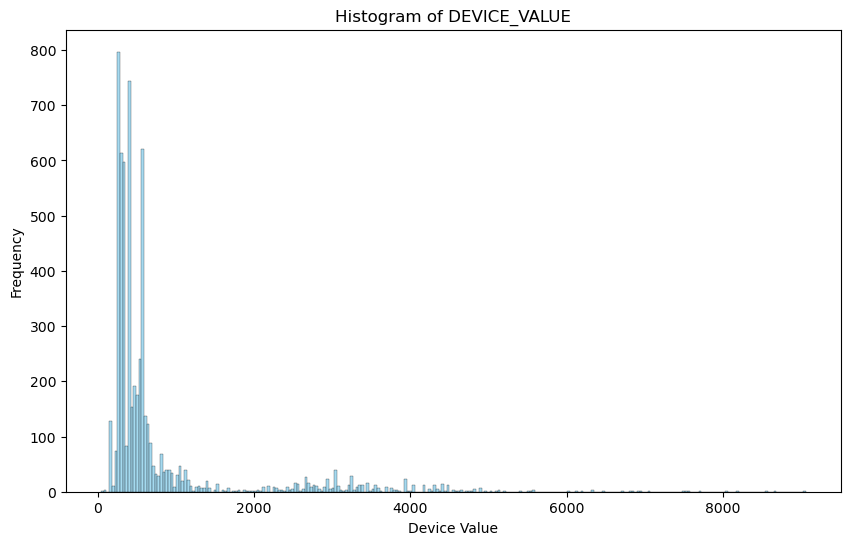

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(x= df04['DEVICE_VALUE'] , kde=False, color='skyblue')
plt.xlabel('Device Value')
plt.ylabel('Frequency')
plt.title('Histogram of DEVICE_VALUE')
#plt.show()


It looks like an exponential distibution, we could also think that it could be normal as it has that pick but as from 2000 to 5000 it still has some frequency we can't assure.

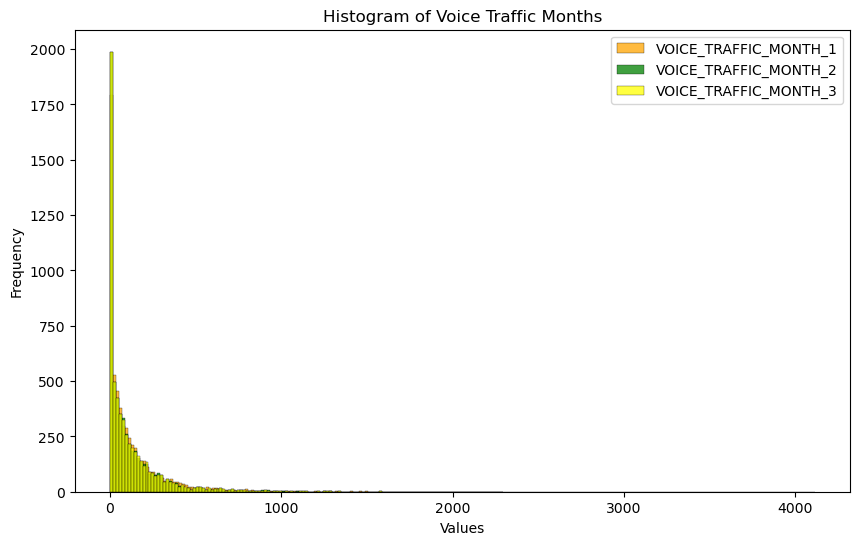

In [19]:
plt.figure(figsize=(10, 6))

sns.histplot(data=df04['VOICE_TRAFFIC_MONTH_1'], color='orange', kde=False, label='VOICE_TRAFFIC_MONTH_1')
sns.histplot(data=df04['VOICE_TRAFFIC_MONTH_2'], color='green', kde=False, label='VOICE_TRAFFIC_MONTH_2')
sns.histplot(data=df04['VOICE_TRAFFIC_MONTH_3'], color='yellow', kde=False, label='VOICE_TRAFFIC_MONTH_3')


plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Voice Traffic Months')

# Add legend
plt.legend()

These three have clearly an exponential distribution, as we can see they decrease really fast.

Text(0.5, 1.0, 'Histogram of DURATION_LINE')

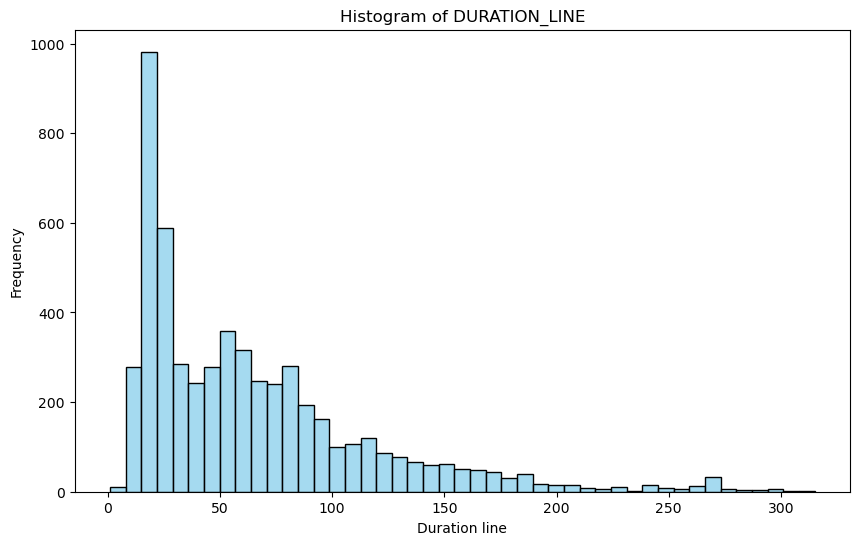

In [20]:
plt.figure(figsize=(10, 6))

sns.histplot(x= df04['DURATION_LINE'] , kde=False, color='skyblue')

plt.xlabel('Duration line')
plt.ylabel('Frequency')
plt.title('Histogram of DURATION_LINE')

This one also seems to have an exponential distribution, but we cannot assure as there are some values at the beggining that have less frequency (it goes up first and then it goes down) exponential distribution goes down only.

Text(0.5, 1.0, 'Histogram of BILLING_MONTH_2')

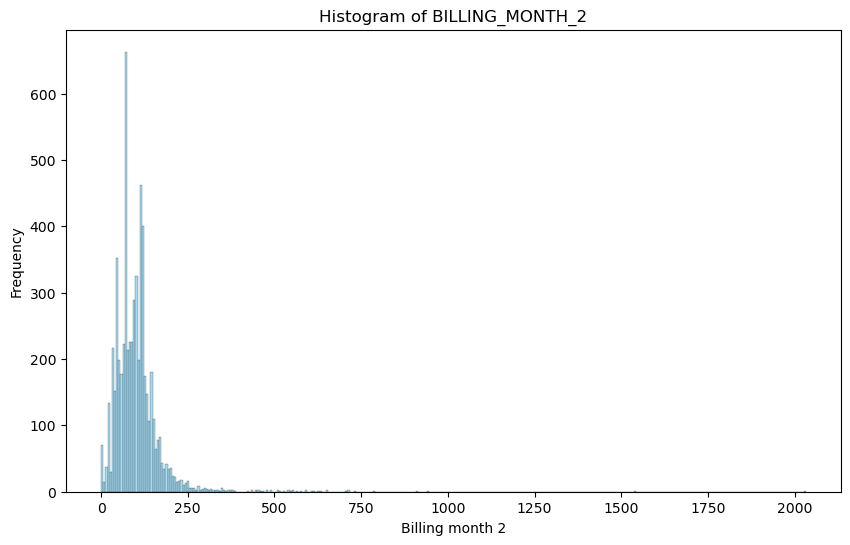

In [21]:
plt.figure(figsize=(10, 6))

sns.histplot(x= df04['BILLING_MONTH_2'] , kde=False, color='skyblue')

plt.xlabel('Billing month 2')
plt.ylabel('Frequency')
plt.title('Histogram of BILLING_MONTH_2')

This one seems to have a normal/gaussian distribution, as we can see more or less the gaussian bell form, the majority of the values are close to the mean.

<font size="+1" color="red">Replace this cell with code to apply **log(x+1)** to **VOICE\_TRAFFIC\_MONTH\_2** and plot its new distribution.</font>

Text(0.5, 1.0, 'Voice traffic month 2')

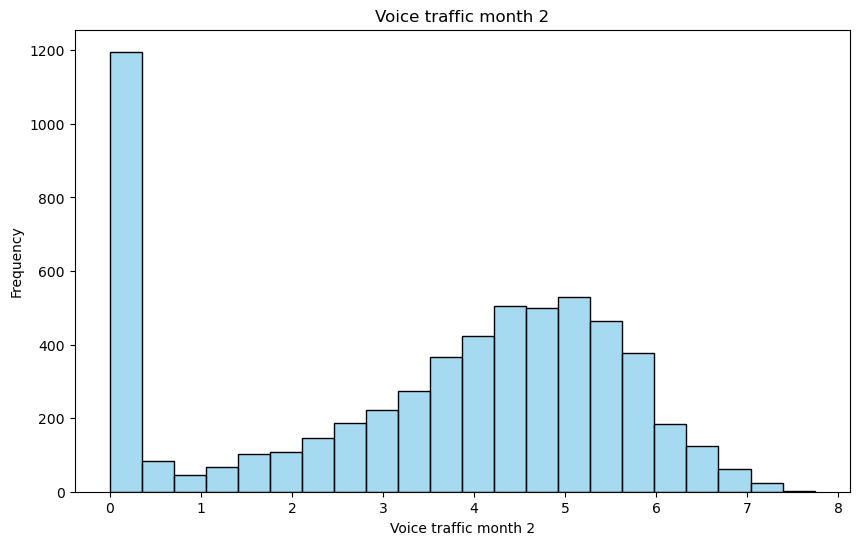

In [22]:
plt.figure(figsize=(10, 6))

sns.histplot(x= np.log(df04['VOICE_TRAFFIC_MONTH_2']+1) , kde=False, color='skyblue')

plt.xlabel('Voice traffic month 2')
plt.ylabel('Frequency')
plt.title('Voice traffic month 2')

<font size="+1" color="red">Replace this cell with code to create a boxplot for variables **DATA\_TRAFFIC\_MONTH\_2**, **VOICE\_TRAFFIC\_MONTH\_2** and **BILLING\_MONTH\_2**</font>

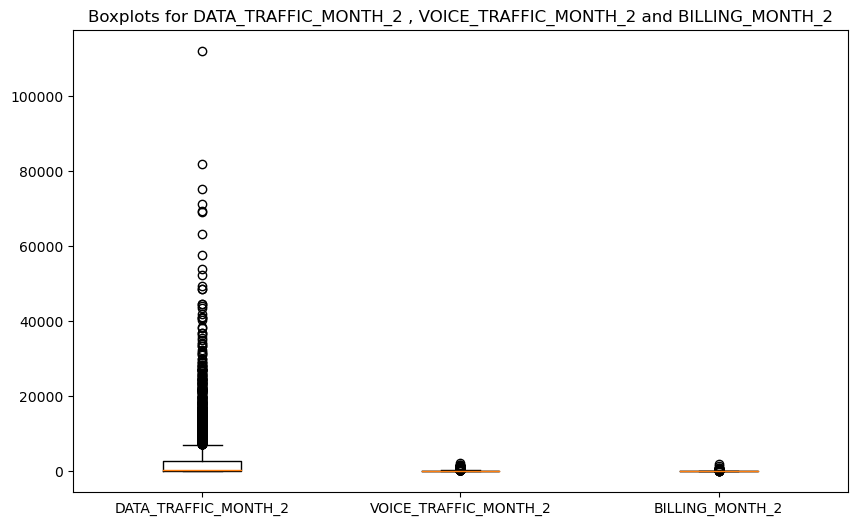

In [23]:
plt.figure(figsize=(10, 6))
plt.title('Boxplots for DATA_TRAFFIC_MONTH_2 , VOICE_TRAFFIC_MONTH_2 and BILLING_MONTH_2')
plt.boxplot(df04[['DATA_TRAFFIC_MONTH_2', 'VOICE_TRAFFIC_MONTH_2', 'BILLING_MONTH_2' ]], labels=['DATA_TRAFFIC_MONTH_2', 'VOICE_TRAFFIC_MONTH_2', 'BILLING_MONTH_2' ])
plt.show()


<font size="+1" color="red">Replace this cell with a brief commentary indicating which extreme values would you use as threshold for **outliers** in these variables, by looking at these box plots</font>

The values that are arround 80000 and 60000, the ones that are far from the majority of the points are considered to be outliers, these can be important as can tell us if we need to notice something that happened and is affecting or they can be just values that can be deleted.

<font size="+1" color="red">Replace this cell with code to calculate the correlation between all traffic attributes (i.e., voice and data), duration line, billing, device cost and device value. Display the result as a table with rows and columns corresponding to columns, and cells indicating correlations. Display the result as an image using ``matshow``</font>

<Figure size 1200x1000 with 0 Axes>

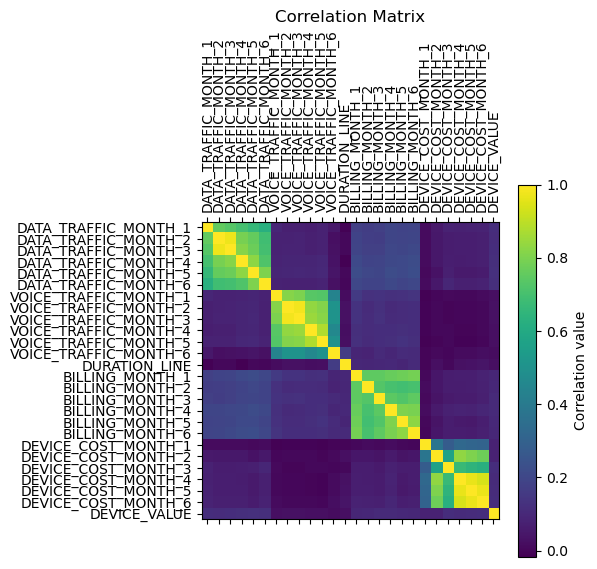

In [24]:
cols = ['DATA_TRAFFIC_MONTH_1', 'DATA_TRAFFIC_MONTH_2', 'DATA_TRAFFIC_MONTH_3', 'DATA_TRAFFIC_MONTH_4', 
                    'DATA_TRAFFIC_MONTH_5', 'DATA_TRAFFIC_MONTH_6', 'VOICE_TRAFFIC_MONTH_1', 'VOICE_TRAFFIC_MONTH_2',
                    'VOICE_TRAFFIC_MONTH_3', 'VOICE_TRAFFIC_MONTH_4', 'VOICE_TRAFFIC_MONTH_5', 'VOICE_TRAFFIC_MONTH_6',
                    'DURATION_LINE', 'BILLING_MONTH_1', 'BILLING_MONTH_2', 'BILLING_MONTH_3', 'BILLING_MONTH_4',
                    'BILLING_MONTH_5', 'BILLING_MONTH_6', 'DEVICE_COST_MONTH_1', 'DEVICE_COST_MONTH_2', 'DEVICE_COST_MONTH_3',
                    'DEVICE_COST_MONTH_4', 'DEVICE_COST_MONTH_5', 'DEVICE_COST_MONTH_6', 'DEVICE_VALUE']

corr_mat = df04[cols].corr()
plt.figure(figsize=(12, 10))
plt.matshow(corr_mat)
plt.colorbar(label='Correlation value')
plt.xticks(np.arange(len(cols)), cols, rotation=90)
plt.yticks(np.arange(len(cols)), cols)
plt.title('Correlation Matrix')
plt.show()

<font size="+1" color="red">Replace this cell with a brief commentary on the results. Is the billing more correlated, in general, with the data traffic or with the voice traffic?</font>

In this matrix we can see the correlation of all the variables, in the diagonal we have 1 as the correlation of every variable with itself is 1.
As we can see the billing month has a higher correlation value with the data traffic than from the voice traffic.

## 2.3. Date management and period calculation

<font size="+1" color="red">Replace this cell with code to create and print `latest_change` and `now`.</font>

In [25]:
format_data = "%Y%m%d"
#to int and then to string
max_val = str(int(df04['LAST_DEVICE_CHANGE'].max()))
#print(max_val)
latest_change = datetime.datetime.strptime(max_val, format_data)
print(latest_change)
now = latest_change + datetime.timedelta(days=30)
print(now)


2019-05-01 00:00:00
2019-05-31 00:00:00


<font size="+1" color="red">Replace this cell with code that replaces the **MONTHS_LAST_DEVICE** column to be equal to the difference, in periods of 30 days, between **LAST_DEVICE_CHANGE** and the `now` variable.</font>

In [26]:
series_converted = pd.to_datetime(df04['LAST_DEVICE_CHANGE'], format='%Y%m%d')

dif = now - series_converted

dif_in_period = dif/(30*datetime.timedelta(days=1))

dif_in_period = dif_in_period.fillna(0).astype(int)
#print(df04['MONTHS_LAST_DEVICE'])

df05 = df04.copy()
df05['MONTHS_LAST_DEVICE'] = dif_in_period

print(df05['MONTHS_LAST_DEVICE'])


0        0
1       26
2        0
3       20
4        5
        ..
9994     0
9995    26
9996    14
9997     0
9999     0
Name: MONTHS_LAST_DEVICE, Length: 5988, dtype: int64


<font size="+1" color="red">Replace this cell with code to update the **DURATION_LINE** value to be the difference, in days, between **LINE_ACTIVATION_DATE** and the `now` variable.
    
Indicate the average of **DURATION_LINE** -- what is that in years, approximately?</font>

In [27]:
df06 = df05.copy()
series_converted_2 = pd.to_datetime(df04['LINE_ACTIVATION_DATE'], format='%Y%m%d')
#display(series_converted_2)


#print(df04['DURATION_LINE'])
df06['DURATION_LINE'] = now - series_converted_2

print('The mean is:', np.mean(df06['DURATION_LINE']))
print( np.mean(df06['DURATION_LINE']/np.timedelta64(1, 'Y')), 'years')




The mean is: 1950 days 18:23:49.195088672
5.344565867424172 years



## 2.4. Standarization and scaling of numerical variables

<font size="+1" color="red">Replace this cell with code to standardize and min-max scale the **DATA_TRAFFIC_MONTH_1**, **VOICE_TRAFFIC_MONTH_1**, **BILLING_MONTH_1** and **DEVICE_COST_MONTH_1** columns. Save the results in new colums with the same name followed by **_STANDARD** and **_MINMAX** (e.g., DATA\_TRAFFIC\_MONTH\_1\_STAND, DATA\_TRAFFIC\_MONTH\_1\_MINMAX). Plot a histogram for each new variable.</font>



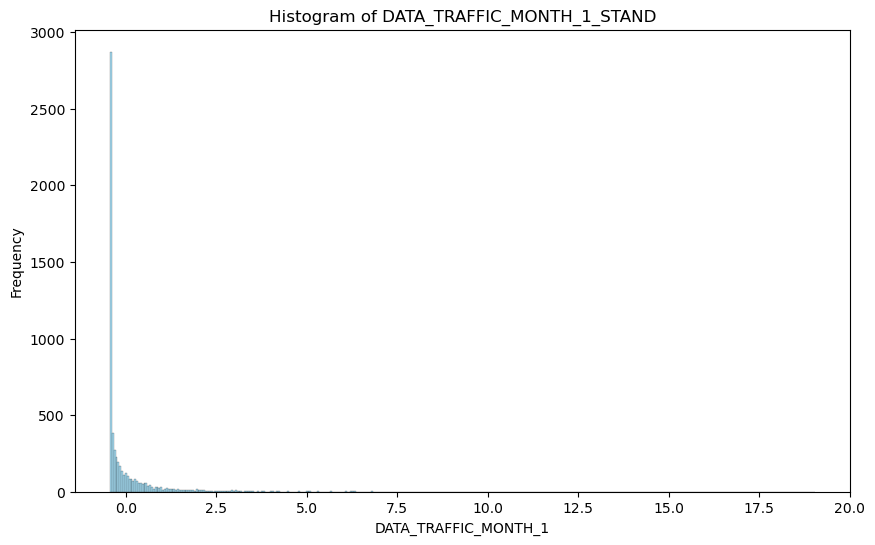

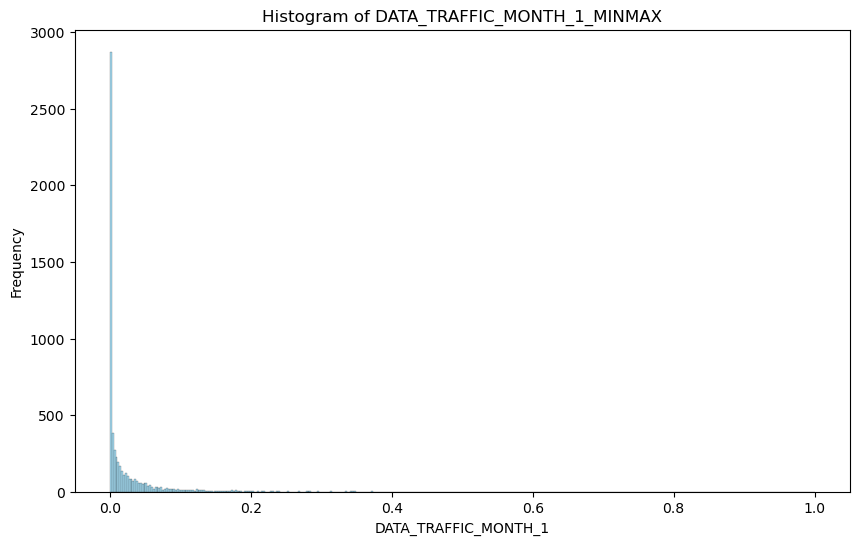

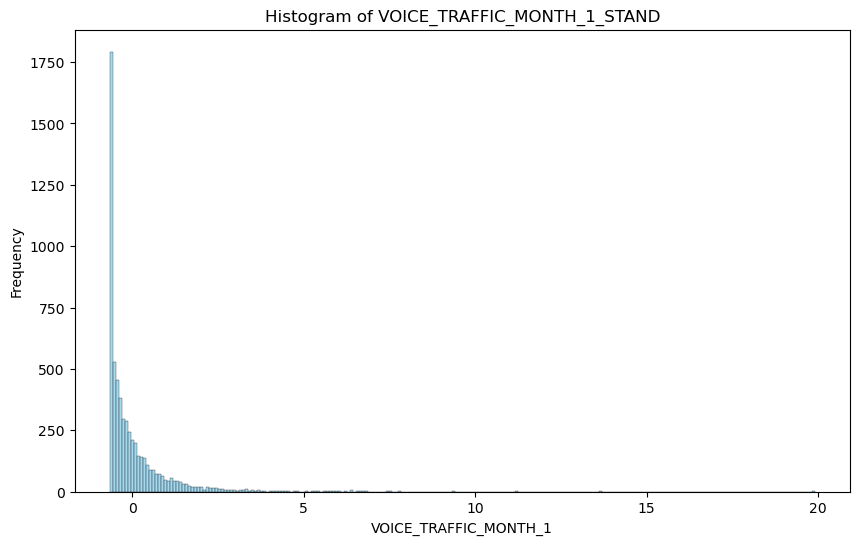

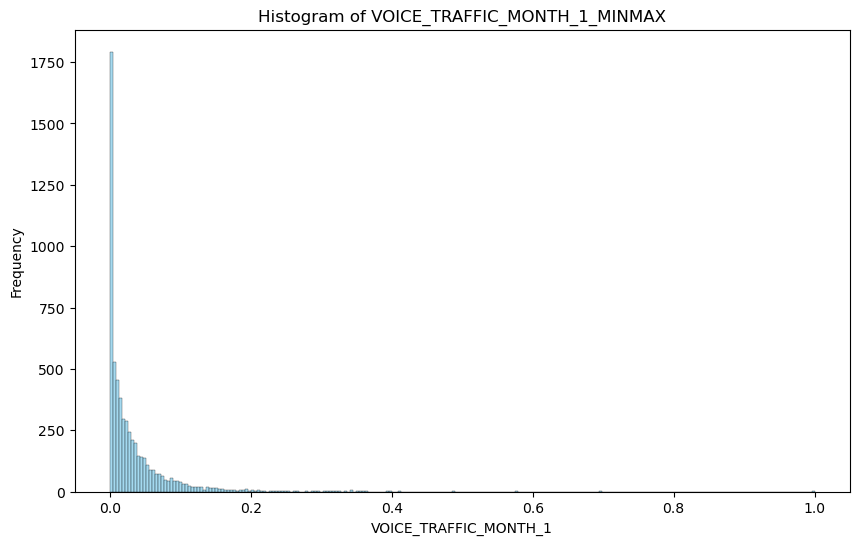

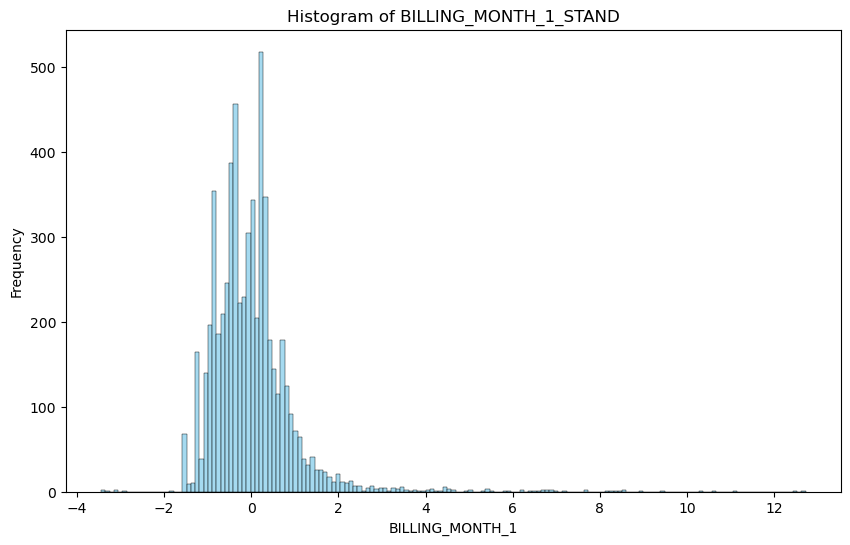

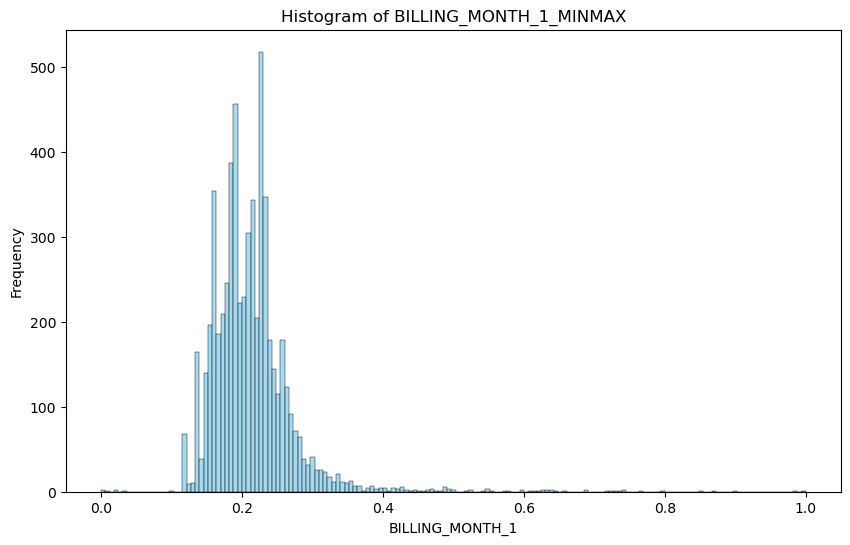

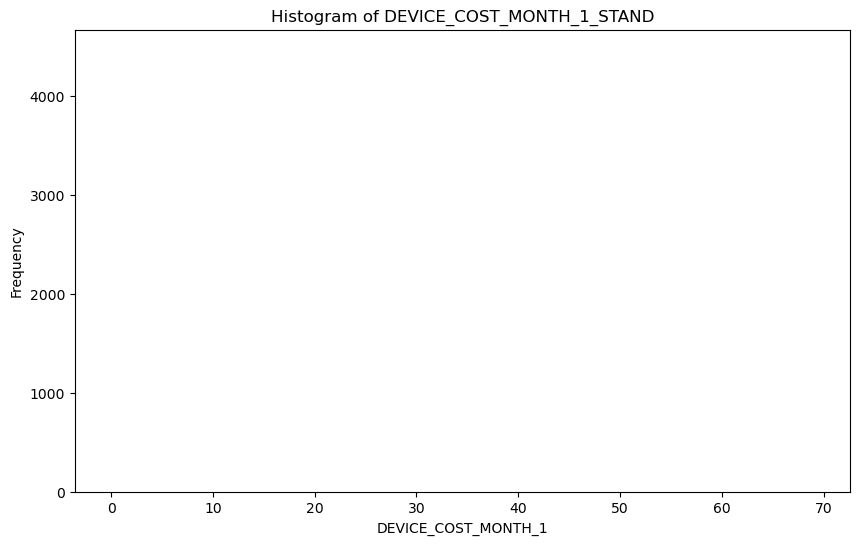

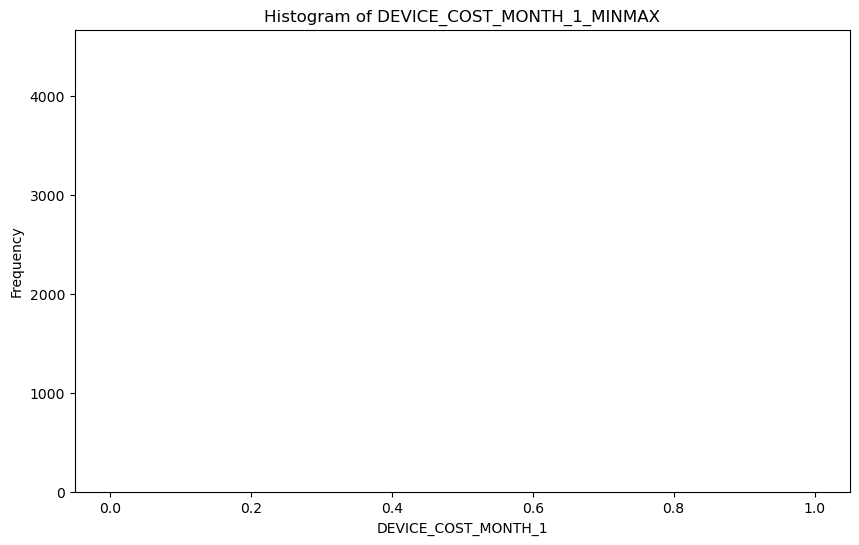

In [28]:
my_arr = ['DATA_TRAFFIC_MONTH_1', 'VOICE_TRAFFIC_MONTH_1', 'BILLING_MONTH_1', 'DEVICE_COST_MONTH_1']

for column in my_arr:
    df06[column + '_STAND'] = StandardScaler().fit_transform(df06[[column]])
    df06[column + '_MINMAX'] = MinMaxScaler().fit_transform(df06[[column]])
    #display(test_df)
    plt.figure(figsize=(10, 6))
    sns.histplot(x= df06[column + '_STAND'] , kde=False, color='skyblue')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title('Histogram of ' + column + '_STAND')
    plt.show()
    
    plt.figure(figsize=(10, 6))
    sns.histplot(x= df06[column + '_MINMAX'] , kde=False, color='skyblue')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title('Histogram of ' + column + '_MINMAX')
    plt.show()


## 2.5. Convert categorical columns to dummy binary variables

<font size="+1" color="red">Create variable **PREVIOUS_DEVICE_BRAND_INT_ENCODED** containing an integer encoding of variable **PREVIOUS_DEVICE_BRAND**.</font>

In [29]:
PREVIOUS_DEVICE_BRAND_INT_ENCODED =  LabelEncoder().fit_transform(df06['PREVIOUS_DEVICE_BRAND'])
print(PREVIOUS_DEVICE_BRAND_INT_ENCODED)

#i wasn't sure if i was asked to create just a variable or include it in the dataset, so here's what i would have done if we needed to include it

#df06['PREVIOUS_DEVICE_BRAND_INT_ENCODED'] = LabelEncoder().fit_transform(df06['PREVIOUS_DEVICE_BRAND'])
df06.head()

[2 4 2 ... 4 2 2]


,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,PREVIOUS_DEVICE_MANUF,PREVIOUS_DEVICE_BRAND,DATA_TRAFFIC_MONTH_1_STAND,DATA_TRAFFIC_MONTH_1_MINMAX,VOICE_TRAFFIC_MONTH_1_STAND,VOICE_TRAFFIC_MONTH_1_MINMAX,BILLING_MONTH_1_STAND,BILLING_MONTH_1_MINMAX,DEVICE_COST_MONTH_1_STAND,DEVICE_COST_MONTH_1_MINMAX
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.0,NaN,465.24673,530.80615,530.80615,781.12646,398.99377,1169.39610,47.50000,...,"Motorola Mobility LLC, a Lenovo Company",Motorola,-0.361918,0.004138,-0.414888,0.011549,-0.196703,0.201028,0.019216,0.001863
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20170401.0,232.24121,272.25525,272.25525,704.88519,412.71664,365.14441,3.70000,...,Samsung Korea,Samsung,-0.402274,0.002066,-0.633700,0.000900,-0.800894,0.163679,-0.109773,0.000000
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.0,NaN,484.62036,264.13843,264.13843,348.50073,380.44156,250.73566,26.10000,...,"Motorola Mobility LLC, a Lenovo Company",Motorola,-0.358563,0.004311,-0.521796,0.006346,0.346838,0.234627,-0.109773,0.000000
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20171001.0,4255.46040,836.11707,836.11707,691.55640,146.76660,302.49249,175.70000,...,Apple Inc,Apple,0.294532,0.037853,0.225559,0.042718,-0.602781,0.175925,-0.045279,0.000932
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.0,20190101.0,5014.10300,2659.05150,2659.05150,2435.03930,2053.97950,1553.11500,383.89999,...,"Motorola Mobility LLC, a Lenovo Company",Outros,0.425926,0.044601,1.265663,0.093338,0.171507,0.223789,-0.109773,0.000000


<font size="+1" color="red">Replace this cell with code to convert **PREVIOUS_DEVICE_MANUF** to dummy binary variables.</font>

In [30]:
my_dummies = pd.get_dummies(df06['PREVIOUS_DEVICE_MANUF'], prefix = 'PREVIOUS_DEVICE_MANUF_')
df07 = df06.join(my_dummies)
display(df07)

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,PREVIOUS_DEVICE_MANUF__Telit Communications SpA,PREVIOUS_DEVICE_MANUF__Topmax Glory Limited,PREVIOUS_DEVICE_MANUF__Umi Network Technology Co Limited,PREVIOUS_DEVICE_MANUF__United Mobile,PREVIOUS_DEVICE_MANUF__United Time Hong Kong Ltd,PREVIOUS_DEVICE_MANUF__Vikin Communication Technology Co Limited,PREVIOUS_DEVICE_MANUF__Vogtec (H.K) Co Ltd,PREVIOUS_DEVICE_MANUF__Xiaomi Communications Co Ltd,PREVIOUS_DEVICE_MANUF__ZTE Corporation,PREVIOUS_DEVICE_MANUF__u-blox AG
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.0,NaN,465.24673,530.80615,530.80615,781.126460,398.993770,1169.39610,47.50000,...,False,False,False,False,False,False,False,False,False,False
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20170401.0,232.24121,272.25525,272.25525,704.885190,412.716640,365.14441,3.70000,...,False,False,False,False,False,False,False,False,False,False
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.0,NaN,484.62036,264.13843,264.13843,348.500730,380.441560,250.73566,26.10000,...,False,False,False,False,False,False,False,False,False,False
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20171001.0,4255.46040,836.11707,836.11707,691.556400,146.766600,302.49249,175.70000,...,False,False,False,False,False,False,False,False,False,False
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.0,20190101.0,5014.10300,2659.05150,2659.05150,2435.039300,2053.979500,1553.11500,383.89999,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,297.0,NaN,11032.31700,5755.06540,5755.06540,5290.147500,2917.549800,4494.50200,597.79999,...,False,False,False,False,False,False,False,False,False,False
9995,TGMO36762000_MOTOROLA XT1941 SMARTPHONE PRETO,1041.0,20170401.0,24526.06600,14820.21800,14820.21800,19684.520000,10024.089000,7423.10740,247.50000,...,False,False,False,False,False,False,False,False,False,False
9996,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,585.0,20180401.0,1007.76560,335.01740,335.01740,171.912730,555.694210,425.69946,88.50000,...,False,False,False,False,False,False,False,False,False,False
9997,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,585.0,NaN,189.17578,155.54840,155.54840,51.755936,62.371407,230.53328,38.50000,...,False,False,False,False,False,False,False,False,False,False


## 2.6. Feature generation

<font size="+1" color="red">Replace this cell with code to create from the 6 months of **DATA_TRAFFIC\_MONTH\_[1-6]**, **VOICE_TRAFFIC\_MONTH\_[1-6]**, **BILLING\_MONTH\_[1-6]** and **DEVICE_COST\_MONTH\_[1-6]**, new columns with the mean, maximum, minimum, range (i.e., difference between maximum and minimum) for each element. For instance, column **DATA_TRAFFIC_MEAN** should contain the average of these six numbers: **DATA_TRAFFIC_MONTH_1**, **DATA_TRAFFIC_MONTH_2**, ..., **DATA_TRAFFIC_MONTH_6**.</font>

In [31]:
df08 = df07.copy()

dt_months = ['DATA_TRAFFIC_MONTH_1', 'DATA_TRAFFIC_MONTH_2', 'DATA_TRAFFIC_MONTH_3', 'DATA_TRAFFIC_MONTH_4', 'DATA_TRAFFIC_MONTH_5', 'DATA_TRAFFIC_MONTH_6']
df08['DATA_TRAFFIC_MEAN'] = df07[dt_months].mean(axis=1)
df08['DATA_TRAFFIC_MAX'] = df07[dt_months].max(axis = 1)
df08['DATA_TRAFFIC_MIN'] = df07[dt_months].min(axis=1)
df08['DATA_TRAFFIC_DIFFERENCE'] = df08['DATA_TRAFFIC_MAX'] - df08['DATA_TRAFFIC_MIN']

vt_months = ['VOICE_TRAFFIC_MONTH_1', 'VOICE_TRAFFIC_MONTH_2', 'VOICE_TRAFFIC_MONTH_3', 'VOICE_TRAFFIC_MONTH_4', 'VOICE_TRAFFIC_MONTH_5', 'VOICE_TRAFFIC_MONTH_6']
df08['VOICE_TRAFFIC_MEAN'] = df07[vt_months].mean(axis=1)
df08['VOICE_TRAFFIC_MAX'] = df07[vt_months].max(axis = 1)
df08['VOICE_TRAFFIC_MIN'] = df07[vt_months].min(axis=1)
df08['VOICE_TRAFFIC_DIFFERENCE'] = df08['VOICE_TRAFFIC_MAX'] - df08['VOICE_TRAFFIC_MIN']

b_months = ['BILLING_MONTH_1', 'BILLING_MONTH_2', 'BILLING_MONTH_3', 'BILLING_MONTH_4', 'BILLING_MONTH_5', 'BILLING_MONTH_6']
df08['BILLING_MEAN'] = df07[b_months].mean(axis=1)
df08['BILLING_MAX'] = df07[b_months].max(axis = 1)
df08['BILLING_MIN'] = df07[b_months].min(axis=1)
df08['BILLING_DIFFERENCE'] = df08['BILLING_MAX'] - df08['BILLING_MIN']

dc_months = ['DEVICE_COST_MONTH_1', 'DEVICE_COST_MONTH_2', 'DEVICE_COST_MONTH_3', 'DEVICE_COST_MONTH_4', 'DEVICE_COST_MONTH_5', 'DEVICE_COST_MONTH_6']
df08['DEVICE_COST_MEAN'] = df07[dc_months].mean(axis=1)
df08['DEVICE_COST_MAX'] = df07[dc_months].max(axis = 1)
df08['DEVICE_COST_MIN'] = df07[dc_months].min(axis=1)
df08['DEVICE_COST_DIFFERENCE'] = df08['DEVICE_COST_MAX'] - df08['DEVICE_COST_MIN']

<font size="+1" color="red">Replace this cell with code create an additional column **DEVICE_COST_TO_BILLING_RATIO** containing the ratio between **DEVICE_COST_MEAN** and **BILLING_MEAN** and plot its distribution.</font>

Text(0, 0.5, 'Frequency')

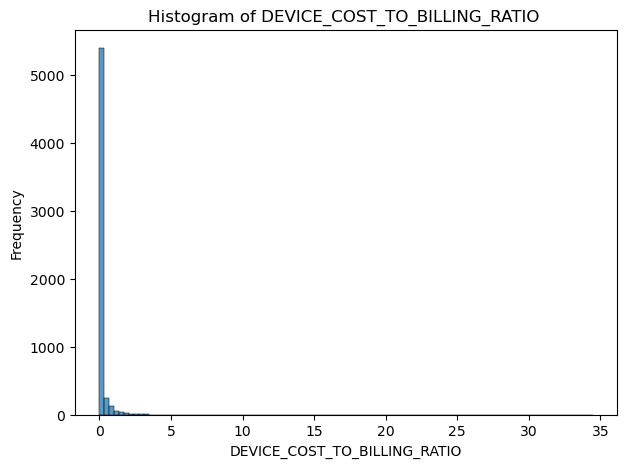

In [32]:
df08['DEVICE_COST_TO_BILLING_RATIO'] = df08['DEVICE_COST_MEAN'] / df08['BILLING_MEAN']
plt.figure(figsize=(7, 5))
sns.histplot(df08['DEVICE_COST_TO_BILLING_RATIO'], bins = 100)

plt.title('Histogram of DEVICE_COST_TO_BILLING_RATIO ')
plt.xlabel('DEVICE_COST_TO_BILLING_RATIO')
plt.ylabel('Frequency')
#plt.show()

<font size="+1" color="red">Replace this cell with a brief commentary on the distribution of the variable **DEVICE_COST_TO_BILLING_RATIO**. Can you recognize its distribution?</font>

It looks like exponential distribution, we can see that most part of the values are between 0 and 0.5.

## 2.7. Text parsing/processing

<font size="+1" color="red">Replace this cell with code to use the **PURCHASED_DEVICE** variable to create 3 new columns with the following variables names: **PURCHASED_DEVICE_CODE**, **PURCHASED_DEVICE_MANUFACTURER** and **PURCHASED_DEVICE_MODEL**.</font>

In [33]:
split_purchase_device = df08['PURCHASED_DEVICE'].str.split(n=2, expand=True)

df08['PURCHASED_DEVICE_CODE'] = split_purchase_device[0]
df08['PURCHASED_DEVICE_MANUFACTURER'] = split_purchase_device[1]
df08['PURCHASED_DEVICE_MODEL'] = split_purchase_device[2]

#print(df08[['PURCHASED_DEVICE_CODE', 'PURCHASED_DEVICE_MANUFACTURER', 'PURCHASED_DEVICE_MODEL']])

<font size="+1" color="red">Replace this cell with code to create two tables: one with the number of devices per manufacturer in **PURCHASED_DEVICE_MANUFACTURER** and one with the number of devices per manufacturer in  **PREVIOUS_DEVICE_MANUF**.

In [34]:
purchased_device_manufacturer_counts = df08['PURCHASED_DEVICE_MANUFACTURER'].value_counts()
previous_device_manufacturer_counts = df08['PREVIOUS_DEVICE_MANUF'].value_counts()

purchased_device_manufacturer_table = pd.DataFrame(purchased_device_manufacturer_counts)
previous_device_manufacturer_table = pd.DataFrame(previous_device_manufacturer_counts)

display(purchased_device_manufacturer_table)
display(previous_device_manufacturer_table)


,count
PURCHASED_DEVICE_MANUFACTURER,
X210BMW,3273
IPHONE,448
X410BCW,266
J410G,258
5033J,194
J610G,189
J415G,157
XT1922,126
J810M,117


,count
PREVIOUS_DEVICE_MANUF,
Samsung Korea,1879
Apple Inc,1495
"Motorola Mobility LLC, a Lenovo Company",849
LG Electronics Inc.,506
TCL Communication Ltd,279
...,...
Lanxun Technology (Hong Kong) Limited,1
Beijing Flyscale Technologies Company Limited,1
Meizu Technology Co Ltd,1


## 2.8. Splitting and sampling a dataset

<font size="+1" color="red">Replace this cell with code to split the dataset in two separate datasets: one with 70% of the rows and the other with 30% of rows</font>

In [35]:
train_data, test_data = train_test_split(df08, test_size=0.3, random_state=42)

print(df08.shape)
print(train_data.shape)
print(test_data.shape)

(5988, 128)
(4191, 128)
(1797, 128)


<font size="+1" color="red">Replace this cell with code to compute the main statistics (mean, standard deviation, min, max, 25%, 50%, 75%) for the variables **DATA_TRAFFIC_MONTH_1**, **VOICE_TRAFFIC_MONTH_1** and **BILLING_MONTH_1** in both training and testing parts of the dataset.</font>

<font size="+1" color="red">Replace this cell with a brief commentary indicating if you find these statistics match between the two splits, or do not match between them.</font>

In [36]:
#training
train_data['DATA_TRAFFIC_MONTH_1'].describe()

count      4191.000000
mean       2549.413369
std        5612.925323
min           0.000000
25%           0.000000
50%         399.495180
75%        2842.258300
max      112421.170000
Name: DATA_TRAFFIC_MONTH_1, dtype: float64

In [37]:
train_data['VOICE_TRAFFIC_MONTH_1'].describe()

count    4191.000000
mean      132.017466
std       203.667800
min         0.000000
25%        10.200000
50%        64.199997
75%       171.550005
max      4113.000000
Name: VOICE_TRAFFIC_MONTH_1, dtype: float64

In [38]:
train_data['BILLING_MONTH_1'].describe()

count    4191.000000
mean      100.034102
std        65.029060
min      -124.490000
25%        63.355000
50%        92.990000
75%       121.140000
max       911.720000
Name: BILLING_MONTH_1, dtype: float64

In [39]:
test_data['DATA_TRAFFIC_MONTH_1'].describe()

count     1797.000000
mean      2567.662237
std       6135.745486
min          0.000000
25%          0.000000
50%        346.775850
75%       2419.699500
max      97074.617000
Name: DATA_TRAFFIC_MONTH_1, dtype: float64

In [40]:
test_data['VOICE_TRAFFIC_MONTH_1'].describe()

count    1797.000000
mean      127.124931
std       191.842889
min         0.000000
25%         9.200000
50%        58.700001
75%       165.200000
max      2377.899900
Name: VOICE_TRAFFIC_MONTH_1, dtype: float64

In [41]:
test_data['BILLING_MONTH_1'].describe()

count    1797.000000
mean       98.415643
std        64.830347
min       -21.030000
25%        63.000000
50%        92.690000
75%       120.840000
max       926.410000
Name: BILLING_MONTH_1, dtype: float64

We can see that the values are really similar but as both have different amount of data there are some differences, but they look pretty similar.

# 3. Comparing iPhone and Samsung J series users

<font size="+1" color="red">Replace this cell with code to create two dataframes: one with all the attributes of Apple iPhone users and one with all the attributes of Samsung J series users.</font>

In [42]:
apple = df08[df08['PURCHASED_DEVICE'].str.contains('APPLE', case=False)]
samsung = df08[df08['PURCHASED_DEVICE'].str.contains('SAMSUNG', case=False) & df08['PURCHASED_DEVICE'].str.contains('J', case=False) ]
display(apple)

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,BILLING_MIN,BILLING_DIFFERENCE,DEVICE_COST_MEAN,DEVICE_COST_MAX,DEVICE_COST_MIN,DEVICE_COST_DIFFERENCE,DEVICE_COST_TO_BILLING_RATIO,PURCHASED_DEVICE_CODE,PURCHASED_DEVICE_MANUFACTURER,PURCHASED_DEVICE_MODEL
7,DGAP068C2000_APPLE IPHONE 8 256GB CINZA PPB/PI...,3465.0,20170101.0,1520.20560,2196.57450,2196.57450,1815.7009,2101.68160,3224.2834,206.899990,...,115.00,71.31,13.000000,13.0,13.0,0.0,0.088564,DGAP068C2000_APPLE,IPHONE,8 256GB CINZA PPB/PI643/10
18,DGAP067C2000_APPLE IPHONE 8 64GB CINZA PPB/PI6...,3081.0,20170901.0,990.27838,1011.09700,1011.09700,1025.9695,2778.35010,1822.9507,102.900000,...,60.99,2.96,124.000000,124.0,124.0,0.0,1.984529,DGAP067C2000_APPLE,IPHONE,8 64GB CINZA PPB/PI643/10
39,DGAP068C2000_APPLE IPHONE 8 256GB CINZA PPB/PI...,3681.0,20161001.0,3916.90450,2703.32230,2703.32230,1860.9038,3112.77320,2625.4236,160.899990,...,192.84,105.96,122.000000,183.0,0.0,183.0,0.498593,DGAP068C2000_APPLE,IPHONE,8 256GB CINZA PPB/PI643/10
52,DGAP067C2007_APPLE IPHONE 8 64GB CINZA PPB/PI...,2841.0,20170901.0,1017.50700,1079.26210,1079.26210,1178.9795,1192.96750,1070.2297,303.200010,...,148.99,39.76,7.000000,7.0,7.0,0.0,0.039319,DGAP067C2007_APPLE,IPHONE,8 64GB CINZA PPB/PI643/10
53,DGAP067C2007_APPLE IPHONE 8 64GB CINZA PPB/PI...,2961.0,20170901.0,257.38675,604.08844,604.08844,1394.2441,102.59875,107.8400,117.300000,...,74.99,60.00,7.000000,7.0,7.0,0.0,0.075834,DGAP067C2007_APPLE,IPHONE,8 64GB CINZA PPB/PI643/10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9871,DGAP068C2000_APPLE IPHONE 8 256GB CINZA PPB/PI...,3345.0,20171001.0,8028.22750,4791.39990,4791.39990,4890.1880,6867.35640,4825.1050,31.400000,...,69.99,3.00,84.233333,252.7,0.0,252.7,1.171426,DGAP068C2000_APPLE,IPHONE,8 256GB CINZA PPB/PI643/10
9891,DGAP08163000_APPLE IPHONE XR 64GB PRETO,4305.0,20180101.0,3636.13940,3975.19480,3975.19480,4893.0195,4364.04200,3992.2976,18.500000,...,69.99,0.47,0.000000,0.0,0.0,0.0,0.000000,DGAP08163000_APPLE,IPHONE,XR 64GB PRETO
9892,DGAP069C3000_APPLE IPHONE 8 PLUS 64GB CINZA BA...,3777.0,20170101.0,1023.11510,2831.42140,2831.42140,3015.2114,2819.55590,1135.8162,51.700001,...,123.99,3.00,13.000000,13.0,13.0,0.0,0.103251,DGAP069C3000_APPLE,IPHONE,8 PLUS 64GB CINZA BASICO
9917,DGAP08163000_APPLE IPHONE XR 64GB PRETO,4305.0,20180101.0,2432.91110,5159.84620,5159.84620,3041.3901,2613.57930,2976.4900,85.400002,...,69.99,0.00,0.000000,0.0,0.0,0.0,0.000000,DGAP08163000_APPLE,IPHONE,XR 64GB PRETO


<font size="+1" color="red">Replace this cell with code to compare some variables between the two datasets. Consider 2 or 3 variables, plot together the histograms of each variable in both datasets (including a legend).</font>

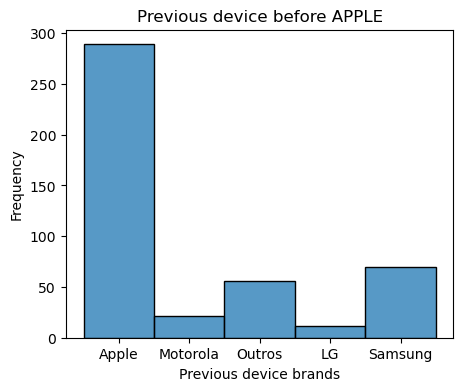

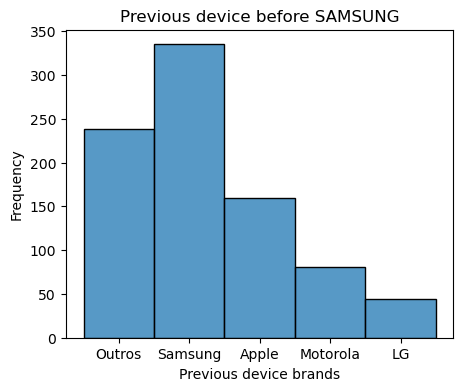

In [43]:
plt.figure(figsize=(5, 4))  
sns.histplot(apple['PREVIOUS_DEVICE_BRAND'])  
plt.title('Previous device before APPLE')
plt.xlabel('Previous device brands')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(5, 4))  
sns.histplot(samsung['PREVIOUS_DEVICE_BRAND'])  
plt.title('Previous device before SAMSUNG')
plt.xlabel('Previous device brands')
plt.ylabel('Frequency')
plt.show()

We can see that the users who previously had an apple device they have a tendancy of buying also an apple device, the same thing happens with samsung but from the graph we can see that it is not as noticeable as in the graph of previoys device before apple. Samsungs' previous users are more variant.

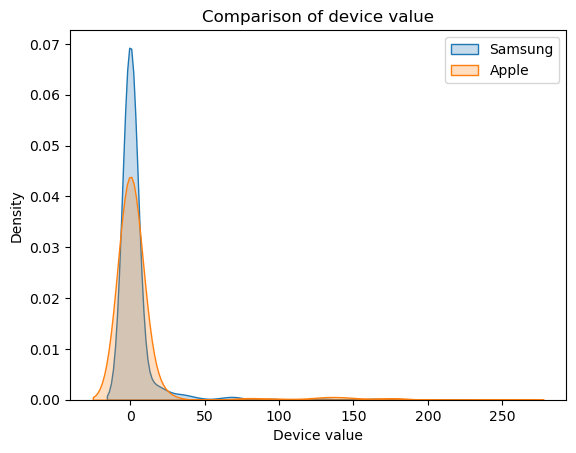

In [49]:
sns.kdeplot(samsung['DEVICE_COST_DIFFERENCE'], label='Samsung', fill=True)
sns.kdeplot(apple['DEVICE_COST_DIFFERENCE'], label='Apple', fill=True)
plt.xlabel('Device cost difference')
plt.ylabel('Density')
plt.title('Comparison of device cost difference')
plt.legend()
plt.show()

Here we can see that the device cost difference of both samsung and apple have a similar distribution, they look like a normal distribution, they have a pretty similar standar deviation, which means the differece between the device cost does not varies a lot. The distribution of Samsung is more sharp and it's standard deviation is samller than the apple distribution, their mean looks similar.

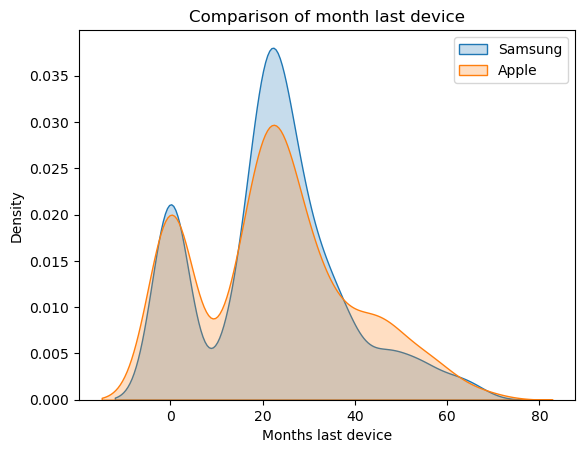

In [45]:
sns.kdeplot(samsung['MONTHS_LAST_DEVICE'], label='Samsung', fill=True)
sns.kdeplot(apple['MONTHS_LAST_DEVICE'], label='Apple', fill=True)
plt.xlabel('Months last device')
plt.ylabel('Density')
plt.title('Comparison of month last device')
plt.legend()
plt.show()

We can see they have a similar distribution so this can mean that the months they last are similar. They have a pretty similar standard deviation, and we cannot see a clear distibution here, but both have 2 pics. 

# EXTRA POINTS

For more learning and extra points, remember what you learned in machine learning and create a simple decision tree model having as input variables:
PREVIOUS_DEVICE_MODEL
PREVIOUS_DEVICE_BRAND
MONTHS_LAST_DEVICE
And as output variable PURCHASED_DEVICE_MANUFACTURER. Measure the accuracy of this 3-variables model. Then, add two more variables, of your own choice, that improve the classification accuracy. Measure the accuracy of this 5-variables model.

In [46]:
X_cat = df08[['PREVIOUS_DEVICE_MODEL', 'PREVIOUS_DEVICE_BRAND']]
X_num = df08[['MONTHS_LAST_DEVICE']]
y = df08['PURCHASED_DEVICE_MANUFACTURER']

#categorical variables
my_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_cat_encoded = my_encoder.fit_transform(X_cat)

X = np.concatenate((X_cat_encoded, X_num), axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating and training the decision tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Calculating accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the 3-variables: ", accuracy)


Accuracy of the 3-variables:  0.46521981079577074


In [47]:
X_cat = df08[['PREVIOUS_DEVICE_MODEL', 'PREVIOUS_DEVICE_BRAND','PREVIOUS_DEVICE_MANUF' ]]
X_num = df08[['MONTHS_LAST_DEVICE', 'DEVICE_VALUE']]
y = df08['PURCHASED_DEVICE_MANUFACTURER']

#categorical variables
my_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_cat_encoded = my_encoder.fit_transform(X_cat)

X = np.concatenate((X_cat_encoded, X_num), axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating and training the decision tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Calculating accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the 5-variables: ", accuracy)

Accuracy of the 5-variables:  0.7579298831385642


As in machine learning course we learned, accuracy is a metric used to measure the performance of a classification model. It is the ratio of correctly predicted instances to the total instances in the dataset. In other words, it measures how many predictions your model got right. The first value we got is 0.46521981079577074, it means my model predicts the PURCHASED_DEVICE_MANUFACTURER the 46% of the time, in the second one, we have more variables and we got a value of accuracy of 0.7579298831385642, which means that our model predicts PURCHASED_DEVICE_MANUFACTURER 76% of the time. As the accuracy has increased from the first model to the second, that means we picked some relevant variables, which helps us to predict better the PURCHASED_DEVICE_MANUFACTURER and it can be that those variables are highly correlated with the variables we previously had.

<font size="+2" color="#003300">I hereby declare that, except for the code provided by the course instructors, all of my code, report, and figures were produced by myself.</font>